# Epipolar geometry - computing fundamental and essential matrices

In this recipe, you will learn how to compute fundamental and essential matrices—the matrices comprising the epipolar geometry constraints in them. These matrices are useful for reconstructing stereo rig extrinsic parameters as well as other two-view vision algorithms. 

We used the `cv2.findFundamentalMat` function to estimate the fundamental matrix from left-right image point correspondences. This function supports a few different algorithms for fundamental matrix parameters estimation, such as `cv2.FM_7POINT` ($7$-point algorithm), `cv2.FM_8POINT` ($8$-point algorithm), `cv2.FM_LMEDS` (least-median approach), and `cv2.FM_RANSAC` (RANSAC-based approach). Two optional parameters specify the error threshold for RANSAC-based estimation algorithms and confidence levels for the leastmedian and RANSAC-based approaches.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import os

%matplotlib auto
%pylab inline

def print_image(header,name,np_arr,
                start_First=0,end_First=1,start_Second=0,end_Second=2,start_3=0,end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')

def draw_grid(img, pxystep=None,major_color=None, pxstep=None,pystep=None):
    #print("{0} XY{1} color{2} X{3} Y{4}".format(img.shape, pxystep,major_color,pxstep,pystep))
    pXYstep = None; pXstep=None; pYstep=None; 
    major_Color=None; minor_Color=None; major_Alpha=None; minor_Alpha=None;
    if pxystep != None:
        pXYstep = pXstep = pYstep = pxystep;
    else:
        pXstep = pxstep if pxstep != None else 100
        pYstep = pystep if pystep != None else 100
    major_Color = major_color if major_color != None else (204, 204, 204) #'#CCCCCC'
    if pXstep != None:
        x = pXstep
        #Draw all lines on X
        while x < img.shape[1]:
            cv2.line(img, (x, 0), (x, img.shape[0]), color=major_Color, thickness=1)
            x += pXstep
    if pYstep != None:
        y = pYstep
        #Draw all lines on Y
        while y < img.shape[0]:
            cv2.line(img, (0, y), (img.shape[1], y), color=major_Color,thickness=1)
            y += pYstep
    return img

def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis); plt.title(name)
        if cmap =='gray': plt.imshow(img,cmap='gray' )
        else: plt.imshow(img)
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    #plt.gca().invert_yaxis() plt.gca().invert_xaxis()
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S09\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s09\env

d:\html_doc\program\opencv\packt\s09\env\lib\site-packages
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\pip-20.1-py3.8.egg
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s09\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S09\env


No handles with labels found to put in legend.


------  left_pts[0]--------------    Shape(54, 1, 2) left_pts: float32
[[244.40834   94.123985] ]
[[274.40363  92.2132 ] ]
[[305.502    90.32179] ]
[[338.30807  88.80915] ]
[[371.71494  87.87463] ]
[[406.45355  86.72023] ]
[[441.62607  86.25035] ]
------  right_pts[0]-------------    Shape(54, 1, 2) right_pts: float32
[[127.766815 110.40713 ] ]
[[153.83272 107.83741] ]
[[181.37804 105.09254] ]
[[210.96263  102.410416] ]
[[241.4856  100.09745] ]
[[274.36615  98.01102] ]
[[308.52225  96.07202] ]


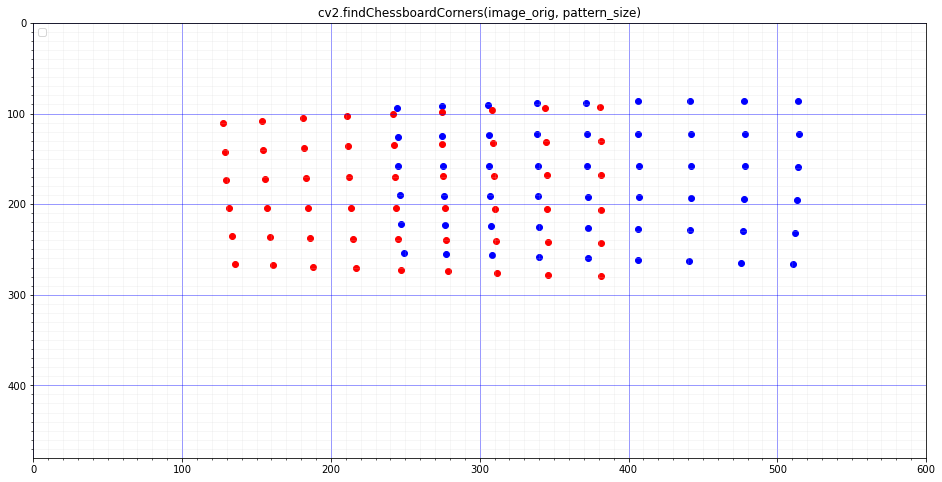

In [2]:
data = np.load('data/stereo/case1/stereo.npy', allow_pickle = True).item()

Kl, Kr, Dl, Dr = data['Kl'], data['Kr'], data['Dl'], data['Dr']
left_pts, right_pts = data['left_pts'], data['right_pts']
E_from_stereo, F_from_stereo = data['E'], data['F']



##############################################################
print_image('left_pts[0]', 'left_pts',left_pts[0],0,7,0,7)
print_image('right_pts[0]','right_pts',right_pts[0],0,7,0,7)


plt.figure(figsize=(16,8))
plt_view_grid(plt, 'on',(0,600,0,480),(100,10,100,10),major_color='b')
plt.gca().invert_yaxis()

plt.scatter(left_pts[0][:,:,0], left_pts[0][:,:,1],color='blue')
plt.scatter(right_pts[0][:,:,0], right_pts[0][:,:,1],color='red')
#plt.xlabel('image_orig.shape[1]=={}'.format(image_orig.shape[1]));
#plt.ylabel('image_orig.shape[0]=={}'.format(image_orig.shape[0]))
plt.title("cv2.findChessboardCorners(image_orig, pattern_size)");
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


------  left_pts-----------------    Shape(702, 1, 2) left_pts: float32
[[244.40834   94.123985] ]
[[274.40363  92.2132 ] ]
[[305.502    90.32179] ]
[[338.30807  88.80915] ]
[[371.71494  87.87463] ]
[[406.45355  86.72023] ]
[[441.62607  86.25035] ]
------  right_pts----------------    Shape(702, 1, 2) right_pts: float32
[[127.766815 110.40713 ] ]
[[153.83272 107.83741] ]
[[181.37804 105.09254] ]
[[210.96263  102.410416] ]
[[241.4856  100.09745] ]
[[274.36615  98.01102] ]
[[308.52225  96.07202] ]


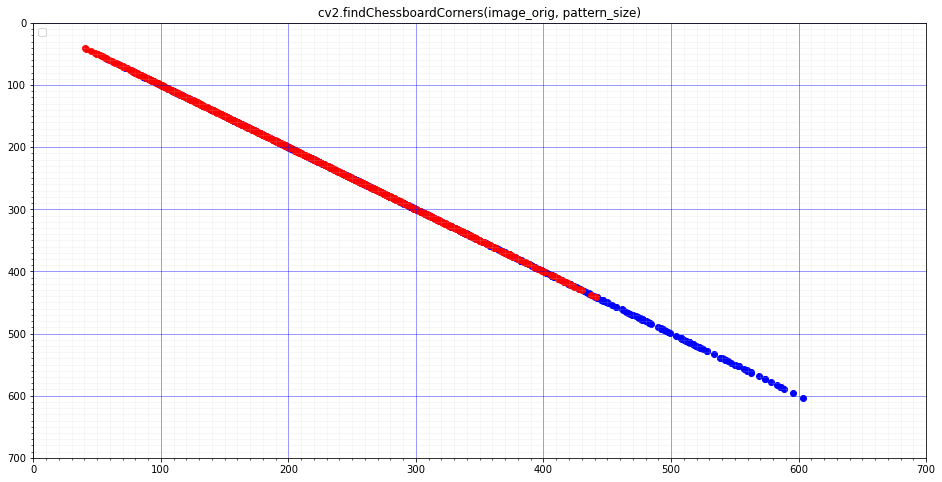

In [3]:
left_pts = np.vstack(left_pts)
right_pts = np.vstack(right_pts)


##############################################################
print_image('left_pts', 'left_pts',left_pts,0,7,0,7)
print_image('right_pts','right_pts',right_pts,0,7,0,7)

plt.figure(figsize=(16,8))
plt_view_grid(plt, 'on',(0,700,0,700),(100,10,100,10),major_color='b')
plt.gca().invert_yaxis()

plt.scatter(left_pts[:300,:], left_pts[:300,:],color='blue')
plt.scatter(right_pts[300:,:], right_pts[300:,:],color='red')
#plt.xlabel('image_orig.shape[1]=={}'.format(image_orig.shape[1]));
#plt.ylabel('image_orig.shape[0]=={}'.format(image_orig.shape[0]))
plt.title("cv2.findChessboardCorners(image_orig, pattern_size)");
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


------  left_pts-----------------    Shape(702, 1, 2) left_pts: float32
[[241.3375    89.544304] ]
[[272.60883  88.28298] ]
[[304.6463   86.76835] ]
[[338.24237  85.3518 ] ]
[[372.46198  84.19723] ]
[[408.31494  82.39813] ]
[[445.16757  80.88823] ]
------  right_pts----------------    Shape(702, 1, 2) right_pts: float32
[[114.64005 101.32124] ]
[[144.28633 100.10106] ]
[[174.70871  98.54929] ]
[[206.56845  96.91167] ]
[[238.76755  95.42803] ]
[[272.91278  93.93666] ]
[[308.02997  92.26501] ]


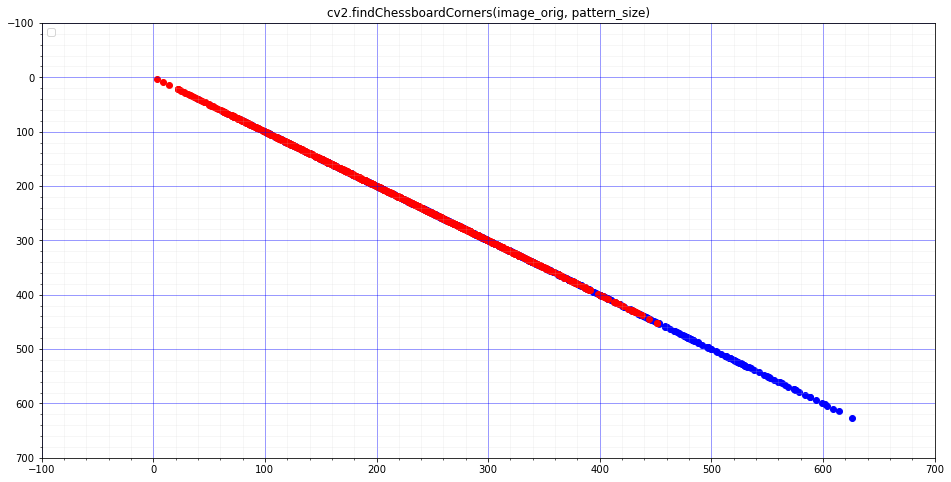

In [4]:
left_pts = cv2.undistortPoints(left_pts, Kl, Dl, P=Kl)
right_pts = cv2.undistortPoints(right_pts, Kr, Dr, P=Kr)


##############################################################
print_image('left_pts', 'left_pts',left_pts,0,7,0,7)
print_image('right_pts','right_pts',right_pts,0,7,0,7)

plt.figure(figsize=(16,8))
plt_view_grid(plt, 'on',(-100,700,-100,700),(100,20,100,20),major_color='b')
plt.gca().invert_yaxis()

plt.scatter(left_pts[:300,:], left_pts[:300,:],color='blue')
plt.scatter(right_pts[300:,:], right_pts[300:,:],color='red')
#plt.xlabel('image_orig.shape[1]=={}'.format(image_orig.shape[1]));
#plt.ylabel('image_orig.shape[0]=={}'.format(image_orig.shape[0]))
plt.title("cv2.findChessboardCorners(image_orig, pattern_size)");
plt.legend(loc='upper left')
plt.show()

In [5]:
F, mask = cv2.findFundamentalMat(left_pts, right_pts, cv2.FM_LMEDS)



##############################################################
print_image('mask', 'mask',mask,0,7,0,7)
print_image('cv2.findFundamentalMat','F',F,0,7,0,7)
print(F)

------  mask---------------------    Shape(702, 1) mask: uint8
[ 0 ]
[ 0 ]
[ 1 ]
[ 1 ]
[ 0 ]
[ 1 ]
[ 1 ]
------  cv2.findFundamentalMat---    Shape(3, 3) F: float64
[ 1.6093882548688654e-08 -2.2390640909389532e-06 -0.00025385060328164677 ]
[ 2.972267031919537e-06 -2.3823638620700232e-07 -0.07702766661042337 ]
[ -0.00025519005573965137 0.07697608195476902 1.0 ]
[[ 1.60938825e-08 -2.23906409e-06 -2.53850603e-04]
 [ 2.97226703e-06 -2.38236386e-07 -7.70276666e-02]
 [-2.55190056e-04  7.69760820e-02  1.00000000e+00]]


In [6]:
E = Kr.T @ F @ Kl

In [7]:
print('Fundamental matrix:')
print(F)
print('Essential matrix:')
print(E)

Fundamental matrix:
[[ 1.60938825e-08 -2.23906409e-06 -2.53850603e-04]
 [ 2.97226703e-06 -2.38236386e-07 -7.70276666e-02]
 [-2.55190056e-04  7.69760820e-02  1.00000000e+00]]
Essential matrix:
[[ 4.62585055e-03 -6.43487140e-01 -4.17486092e-01]
 [ 8.53590806e-01 -6.84088948e-02 -4.08817705e+01]
 [ 2.63679084e-01  4.07046349e+01 -2.20825664e-01]]
